# **Download Libraries**

In [ ]:
pip install sklearn

In [ ]:
pip install xgboost

In [ ]:
pip install sktime

     |████████████████████████████████| 5.9 MB 2.7 MB/s 
     |████████████████████████████████| 3.4 MB 42.9 MB/s 
     |████████████████████████████████| 9.8 MB 45.8 MB/s 
     |████████████████████████████████| 23.1 MB 53.0 MB/s 
     |████████████████████████████████| 26.3 MB 91 kB/s 
     |████████████████████████████████| 233 kB 56.6 MB/s 
  Attempting uninstall: patsy
    Found existing installation: patsy 0.5.1
    Uninstalling patsy-0.5.1:
      Successfully uninstalled patsy-0.5.1
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.34.0
    Uninstalling llvmlite-0.34.0:
      Successfully uninstalled llvmlite-0.34.0
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstal

In [ ]:
pip install holidays

# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor, plot_importance, plot_tree
import holidays
from sklearn.preprocessing import OrdinalEncoder
import lightgbm as lgb

# **Read the Data**

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train

,Date,Store,Item,Sales
0,1-Jan-17,KMart,1,13
1,2-Jan-17,KMart,1,11
2,3-Jan-17,KMart,1,14
3,4-Jan-17,KMart,1,13
4,5-Jan-17,KMart,1,10
...,...,...,...,...
820995,26-Jun-21,SupaIGA,50,82
820996,27-Jun-21,SupaIGA,50,83
820997,28-Jun-21,SupaIGA,50,91
820998,29-Jun-21,SupaIGA,50,122


# **EDA**

In [ ]:
train.shape, test.shape

((821000, 4), (92000, 3))

In [ ]:
train.head()

,Date,Store,Item,Sales
0,1-Jan-17,KMart,1,13
1,2-Jan-17,KMart,1,11
2,3-Jan-17,KMart,1,14
3,4-Jan-17,KMart,1,13
4,5-Jan-17,KMart,1,10


In [ ]:
test.head()

,Date,Store,Item
0,1-Jul-21,KMart,1
1,2-Jul-21,KMart,1
2,3-Jul-21,KMart,1
3,4-Jul-21,KMart,1
4,5-Jul-21,KMart,1


In [ ]:
train.describe()

,Item,Sales
count,821000.000000,821000.000000
mean,25.500000,51.225683
std,14.430878,28.208462
min,1.000000,0.000000
25%,13.000000,29.000000
50%,25.500000,46.000000
75%,38.000000,68.000000
max,50.000000,214.000000


In [ ]:
test.describe()

,Item
count,92000.000000
mean,25.500000
std,14.430948
min,1.000000
25%,13.000000
50%,25.500000
75%,38.000000
max,50.000000


In [ ]:
train.Store.unique(), test.Store.unique()

(array(['KMart', 'Target', 'Coles', 'Woolies', 'BigW', 'Aldi',
        'Asian SuperMart', 'Big Savers', 'Costco', 'SupaIGA'], dtype=object),
 array(['KMart', 'Target', 'Coles', 'Woolies', 'BigW', 'Aldi',
        'Asian SuperMart', 'Big Savers', 'Costco', 'SupaIGA'], dtype=object))

In [ ]:
# final row, sales has missing value
train.isnull()

,Date,Store,Item,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
820995,False,False,False,False
820996,False,False,False,False
820997,False,False,False,False
820998,False,False,False,False


In [ ]:
test.isnull().any()

Date     False
Store    False
Item     False
dtype: bool

In [ ]:
train.dtypes, test.dtypes

(Date     object
 Store    object
 Item      int64
 Sales     int64
 dtype: object, Date     object
 Store    object
 Item      int64
 dtype: object)

In [ ]:
train_date = train.set_index(pd.to_datetime(train["Date"]))

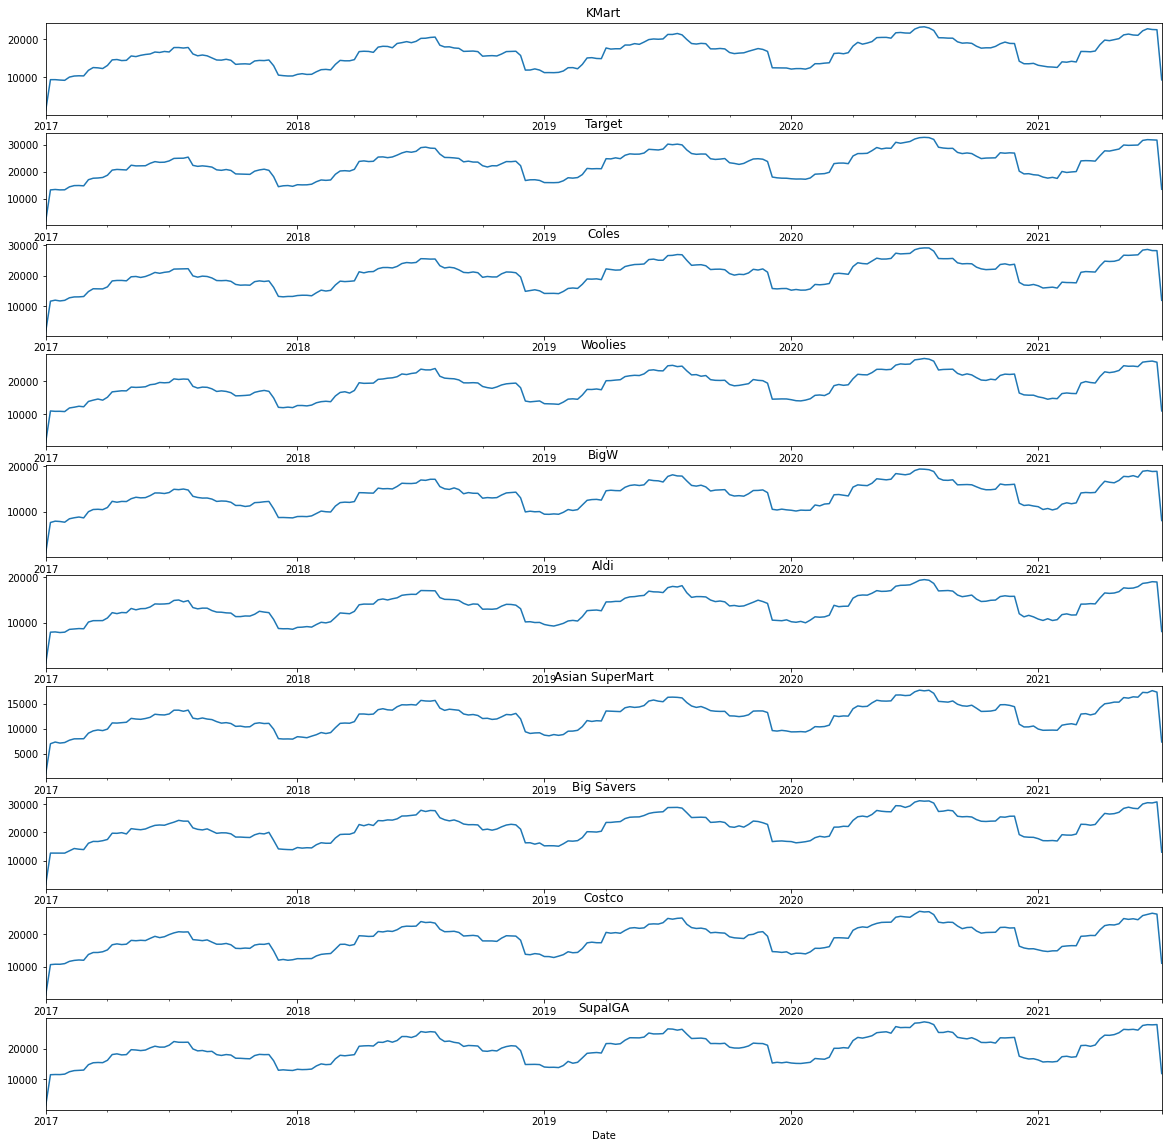

In [ ]:
plt.figure(figsize=(20,20))
i=0
for store in train_date.Store.unique():
  i += 1
  plt.subplot(10,1,i)
  train_date.loc[train_date.Store == store, 'Sales'].sort_index(ascending=True).resample('W').sum().plot()
  plt.title(store)

plt.show()

# **Preprocess the Data**

In [ ]:
# convert to datetime format
train_date = pd.to_datetime(train["Date"])
test_date = pd.to_datetime(test["Date"])

In [ ]:
# split into year, month, date
train["Date"] = train_date
train['Year']=train['Date'].dt.year
train['Month']=train['Date'].dt.month 
train['Day']=train['Date'].dt.day
train['Weekday'] = train['Date'].dt.dayofweek
train['Week'] = train['Date'].dt.week

test["Date"] = test_date
test['Year']=test['Date'].dt.year 
test['Month']=test['Date'].dt.month
test['Day']=test['Date'].dt.day
test['Weekday'] = test['Date'].dt.dayofweek
test['Week'] = test['Date'].dt.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [ ]:
# extract target variables
X = train[["Year","Month","Day","Store","Item","Weekday","Week"]]
y = train["Sales"]

test = test[["Year","Month","Day","Store","Item","Weekday","Week"]]

In [ ]:
# split into training and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [ ]:
# use ordinal encoder to assign numbers to each store
ordinal_encoder = OrdinalEncoder()
X_train[['Store']] = ordinal_encoder.fit_transform(X_train[['Store']])
X_valid[['Store']] = ordinal_encoder.transform(X_valid[['Store']])
test[['Store']] = ordinal_encoder.transform(test[['Store']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

# **Train and Evaluate Model (RandomForest)**

In [ ]:
# Symmetric Mean Absolute Percentage Error

def SMAPE(y, f):
  f = pd.Series(f)
  f.index = y_valid.index
  total = 0
  for i in y.index:
    total += (abs(f[i] - y[i])/ ((y[i] + f[i])/2))
  return(total/len(y))

In [ ]:
# n=7 gives optimal result, 14.75, 30,5 (13.61)
model = RandomForestRegressor(n_estimators=7, random_state=0, n_jobs=-1, min_samples_split=30, min_samples_leaf=5, verbose=True)
model.fit(X_train, y_train)
preds = model.predict(X_valid)
print(mean_absolute_error(y_valid, preds), SMAPE(y_valid, preds))


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:   20.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   7 out of   7 | elapsed:    0.2s finished


6.011836161604459 0.13617839060584494


# **Train and Evaluate Model (XGBoost)**

In [ ]:
xgb_model = XGBRegressor(n_estimators=750, n_jobs=8, learning_rate=0.01)
xgb_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)], 
             verbose=False)
xgb_pred = xgb_model.predict(X_valid)
print(mean_absolute_error(y_valid, xgb_pred), SMAPE(y_valid, xgb_pred))

In [ ]:
_ = plot_importance(xgb_model, height=0.9)

# **Preprocess + Train Full Dataset Using LightGBM**

After training a few models, we found that LightGBM gives the best performance, with 6000 rounds of iteration and a learning rate of 0.01.

In [ ]:
# parameters for lgb encoder
params = {
        'nthread': 10,
        'task': 'train',
        'boosting_type': 'gbdt','metric': 'mape',
         'num_leaves': 39,
        'num_leaves': 64,
        'learning_rate': 0.01,'verbose': 1,
        }

Train the LGB model and generate predictions (takes a while)

In [ ]:
lgb_train = lgb.Dataset(X_train,y_train)
lgb_valid = lgb.Dataset(X_valid,y_valid)
model = lgb.train(params, lgb_train, 6000, valid_sets=[lgb_train, lgb_valid],early_stopping_rounds=1000, verbose_eval=50)
preds = model.predict(test[["Year","Month","Day","Store","Item","Weekday","Week"]])

Training until validation scores don't improve for 1000 rounds.
[50]	training's mape: 0.530166	valid_1's mape: 0.528114
[100]	training's mape: 0.451575	valid_1's mape: 0.449787
[150]	training's mape: 0.390184	valid_1's mape: 0.388687
[200]	training's mape: 0.335526	valid_1's mape: 0.334222
[250]	training's mape: 0.293332	valid_1's mape: 0.292214
[300]	training's mape: 0.262161	valid_1's mape: 0.261154
[350]	training's mape: 0.235989	valid_1's mape: 0.235065
[400]	training's mape: 0.21503	valid_1's mape: 0.2142
[450]	training's mape: 0.198222	valid_1's mape: 0.197485
[500]	training's mape: 0.185656	valid_1's mape: 0.184976
[550]	training's mape: 0.175115	valid_1's mape: 0.174503
[600]	training's mape: 0.16716	valid_1's mape: 0.166616
[650]	training's mape: 0.160607	valid_1's mape: 0.160116
[700]	training's mape: 0.155765	valid_1's mape: 0.155334
[750]	training's mape: 0.151934	valid_1's mape: 0.151563
[800]	training's mape: 0.148901	valid_1's mape: 0.148563
[850]	training's mape: 0.1466

In [ ]:
output_idx = test.index + 1
preds_full_out = pd.DataFrame({"ID": output_idx, "Sales":preds})

In [ ]:
preds_full_out.to_csv("pred_sales.csv", index=False)

In [ ]:
preds_full_out.head(20)

,ID,Sales
0,1,32.516048
1,2,33.003121
2,3,22.123801
3,4,24.979691
4,5,26.690375
5,6,28.289636
6,7,30.006134
7,8,32.537101
8,9,33.505768
9,10,21.888973


***\~The End\~***

---

